In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

--2019-09-08 06:30:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11979363 (11M) [application/x-httpd-php]
Saving to: ‘energydata_complete.csv’

energydata_complete 100%[===================>]  11.42M  17.3MB/s    in 0.7s    

2019-09-08 06:30:45 (17.3 MB/s) - ‘energydata_complete.csv’ saved [11979363/11979363]



In [3]:
data_df = pd.read_csv('energydata_complete.csv', sep=',')
data_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
data_df.shape

(19735, 29)

In [5]:
data_df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [6]:
data_df['date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d %H:%M:%S')
print(data_df['date'].dtypes)

datetime64[ns]


In [7]:
print(type(data_df['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
# 最初の日時からの経過時間を定義
data_df['dif_min'] = data_df['date'].diff().dt.total_seconds()/60
data_df['dif_min'] = data_df['dif_min'].fillna(0)
data_df['dif_min'].head()

0     0.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: dif_min, dtype: float64

In [15]:
data_df['cum_min'] = data_df['dif_min'].cumsum()
data_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


In [10]:
# 欠損値の確認
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

# dataに欠損があるかどうか確認
missing_values_table(data_df)

,Missing Values,% of Total Values
date,0,0.0
Appliances,0,0.0
lights,0,0.0
T1,0,0.0
RH_1,0,0.0
T2,0,0.0
RH_2,0,0.0
T3,0,0.0
RH_3,0,0.0
T4,0,0.0


### set_indexを用いた変換 

In [11]:
data_df['date'] = pd.to_datetime(data_df['date'])
dateindex_df = data_df.set_index('date')
dateindex_df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dif_min,cum_min
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0.0,0.0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,10.0,10.0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,10.0,20.0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,10.0,30.0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,10.0,40.0


In [12]:
# 月の平均値を表示
dateindex_df[['T1', 'T2', 'T3']].resample('M').mean().head()

,T1,T2,T3
date,,,
2016-01-31,19.945175,19.102295,19.876480
2016-02-29,21.163817,19.924704,21.417500
2016-03-31,21.259760,19.141096,21.534074
2016-04-30,21.856511,20.224405,23.018526
2016-05-31,23.877728,23.253625,25.010280


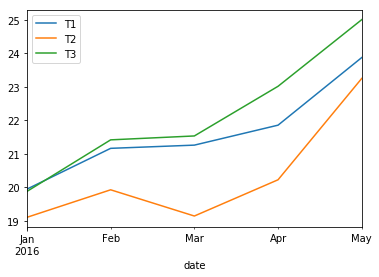

In [17]:
dateindex_df_m_mean = dateindex_df[['T1', 'T2', 'T3']].resample('M').mean()

# データの可視化
dateindex_df_m_mean.plot()

In [0]:
# 統計量の計算
data_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dif_min,cum_min
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.00000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,9.999493,98670.00000
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,0.071184,56971.48117
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,0.00000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,10.000000,49335.00000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,10.000000,98670.00000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,10.000000,148005.00000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,10.000000,197340.00000


### Q．経過時間(分)から経過時間(時)を計算してください。

In [0]:
data_df['cum_hour'] = (data_df['cum_min']/60).round(2).astype(int)
data_df[['date', 'cum_min', 'cum_hour']].head(10)

,date,cum_min,cum_hour
0,2016-01-11 17:00:00,0.0,0
1,2016-01-11 17:10:00,10.0,0
2,2016-01-11 17:20:00,20.0,0
3,2016-01-11 17:30:00,30.0,0
4,2016-01-11 17:40:00,40.0,0
5,2016-01-11 17:50:00,50.0,0
6,2016-01-11 18:00:00,60.0,1
7,2016-01-11 18:10:00,70.0,1
8,2016-01-11 18:20:00,80.0,1
9,2016-01-11 18:30:00,90.0,1


### Q．経過時間（分）から、経過時間（6時間単位）を計算してください。

In [0]:
data_df['cum_6hour'] = (data_df['cum_min']/360).round(2).astype(int)
data_df[['date', 'cum_min', 'cum_6hour']].head(40)

,date,cum_min,cum_6hour
0,2016-01-11 17:00:00,0.0,0
1,2016-01-11 17:10:00,10.0,0
2,2016-01-11 17:20:00,20.0,0
3,2016-01-11 17:30:00,30.0,0
4,2016-01-11 17:40:00,40.0,0
5,2016-01-11 17:50:00,50.0,0
6,2016-01-11 18:00:00,60.0,0
7,2016-01-11 18:10:00,70.0,0
8,2016-01-11 18:20:00,80.0,0
9,2016-01-11 18:30:00,90.0,0


In [0]:
# 経過時間（時）ごとの平均値を計算
data_df.groupby('cum_hour').mean().head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dif_min,cum_min,cum_6hour
cum_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,8.333333,25.0,0.0
1,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,10.000000,85.0,0.0
2,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,10.000000,145.0,0.0
3,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,10.000000,205.0,0.0
4,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,10.000000,265.0,0.0


In [0]:
# 経過時間（時）ごとの標準偏差を計算
data_df.groupby('cum_hour').std().head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dif_min,cum_min,cum_6hour
cum_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.477226,5.477226,0.000000,0.586449,0.000000,0.111888,0.000000,0.112421,0.053972,0.179315,0.021082,0.068605,0.286092,0.961998,0.034427,0.166547,0.054772,0.143673,0.027889,0.101522,0.218263,0.187083,0.000000,0.623610,7.17151,0.187083,15.540453,15.540453,4.082483,18.708287,0.0
1,208.678381,11.690452,0.094249,0.318235,0.098334,0.049065,0.030984,0.046380,0.044907,0.303102,0.027217,0.040369,0.052281,0.786355,0.155859,1.225915,0.013608,0.017691,0.044907,0.000000,0.031180,0.124722,0.311805,0.311805,0.00000,0.031180,17.409430,17.409430,0.000000,18.708287,0.0
2,141.515606,17.606817,0.276355,2.629391,0.251738,1.145478,0.140676,1.626932,0.048736,0.875112,0.042709,0.746929,0.222013,0.439394,0.108259,0.898450,0.119952,0.559317,0.029938,0.024368,0.000000,0.218263,0.935414,0.000000,0.00000,0.155902,10.663979,10.663979,0.000000,18.708287,0.0
3,37.282704,8.366600,0.089086,1.753466,0.064141,0.505110,0.050527,0.573855,0.166626,0.602464,0.276379,8.971516,0.118217,0.483407,0.076643,0.663178,0.159694,0.092440,0.000000,0.078589,0.000000,0.062361,0.311805,0.000000,0.00000,0.062361,16.206531,16.206531,0.000000,18.708287,0.0
4,5.163978,5.163978,0.132945,0.245834,0.116651,0.172597,0.040825,0.143738,0.070669,0.373986,0.373960,11.515309,0.118315,0.407177,0.038879,0.167740,0.107848,0.178421,0.000000,0.107345,0.124722,0.124722,0.311805,0.000000,0.00000,0.062361,13.936675,13.936675,0.000000,18.708287,0.0


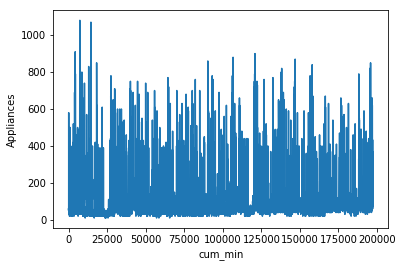

In [0]:
# データの可視化
plt.plot(data_df['cum_min'], data_df['Appliances'])

plt.xlabel('cum_min')
plt.ylabel('Appliances')
plt.show()

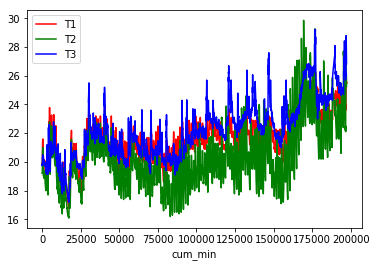

In [0]:
# 台所の温度(T1)、リビングの温度(T2)、洗濯室の温度(T3)の折れ線グラフを1枚に描画
plt.plot(data_df['cum_min'], data_df['T1'], '-r', label='T1')
plt.plot(data_df['cum_min'], data_df['T2'], '-g', label='T2')
plt.plot(data_df['cum_min'], data_df['T3'], '-b', label='T3')

plt.xlabel('cum_min')
plt.legend()
plt.show()

In [0]:
# 電力データの特徴量の作成
data_df = data_df.drop(['date', 'dif_min', 'cum_min'], axis=1)
data_df_mean = data_df.groupby('cum_6hour').mean()

print(data_df_mean.shape)
data_df_mean.head()

(549, 29)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,cum_hour
cum_6hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,17.761597,60.359861,5.917060,86.319259,17.588032,42.991227,18.611667,49.212593,16.922870,45.083727,5.968056,734.944444,89.319444,6.000000,42.236111,4.279167,25.755301,25.755301,2.5
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,18.898519,50.261273,4.828380,91.291250,17.809907,45.246157,19.258958,53.248403,16.953889,46.933009,5.137500,738.166667,91.611111,5.527778,37.000000,3.852778,25.654446,25.654446,8.5
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,18.163125,50.817454,4.805417,95.486944,17.837222,44.153681,18.819421,51.944769,17.092130,48.164306,5.130556,741.602778,91.652778,4.833333,36.333333,3.858333,25.687147,25.687147,14.5
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,17.835370,50.444111,6.817593,81.744213,18.043547,39.421528,18.548661,47.111085,17.117130,44.343287,6.856944,743.645833,80.069444,6.138889,37.236111,3.634722,25.278416,25.278416,20.5
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,17.477870,50.732546,4.973125,89.429097,17.929153,39.186683,18.508258,47.206808,16.949907,43.138241,5.130556,745.366667,87.791667,6.597222,37.097222,3.225000,26.183811,26.183811,26.5


In [0]:
data_df_std = data_df.groupby('cum_6hour').std()

print(data_df_std.shape)
data_df_std.head()

(549, 29)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,cum_hour
cum_6hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,131.366445,13.901582,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611,0.414723,1.462788,0.297577,1.332512,0.522009,0.596499,0.063352,0.331093,0.209700,0.792274,1.994188,0.419750,5.750000,0.486360,14.059392,14.059392,1.732051
1,101.497908,9.137399,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389,0.638244,2.967217,0.073956,1.084293,0.110136,1.817611,0.073297,1.294220,0.278812,1.139221,1.324375,0.759595,5.318432,0.142456,13.002924,13.002924,1.732051
2,104.853639,9.085135,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170,0.353680,0.862196,0.087187,1.725820,0.206920,1.962173,0.068601,1.725213,0.324734,1.053110,1.847940,0.295468,3.769973,0.220443,13.479498,13.479498,1.732051
3,95.999339,0.000000,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715,0.590575,6.661315,0.217270,0.893313,0.107021,0.856309,0.037688,0.611932,0.355107,0.231502,2.313307,1.170741,3.756344,0.496614,13.861185,13.861185,1.732051
4,83.773599,12.097488,0.151195,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231,0.537511,5.582044,0.174957,0.792836,0.127289,1.012191,0.087114,0.661542,0.524397,0.696750,4.713603,0.329442,3.754019,0.306504,13.031960,13.031960,1.732051


In [0]:
data_features = pd.merge(data_df_mean, data_df_std, left_index=True, right_index=True)

print(data_features.shape)
data_features.head()

(549, 58)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,T5_x,RH_5_x,T6_x,RH_6_x,T7_x,RH_7_x,T8_x,RH_8_x,T9_x,RH_9_x,T_out_x,Press_mm_hg_x,RH_out_x,Windspeed_x,Visibility_x,Tdewpoint_x,rv1_x,rv2_x,cum_hour_x,Appliances_y,lights_y,T1_y,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y,T6_y,RH_6_y,T7_y,RH_7_y,T8_y,RH_8_y,T9_y,RH_9_y,T_out_y,Press_mm_hg_y,RH_out_y,Windspeed_y,Visibility_y,Tdewpoint_y,rv1_y,rv2_y,cum_hour_y
cum_6hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,17.761597,60.359861,5.917060,86.319259,17.588032,42.991227,18.611667,49.212593,16.922870,45.083727,5.968056,734.944444,89.319444,6.000000,42.236111,4.279167,25.755301,25.755301,2.5,131.366445,13.901582,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611,0.414723,1.462788,0.297577,1.332512,0.522009,0.596499,0.063352,0.331093,0.209700,0.792274,1.994188,0.419750,5.750000,0.486360,14.059392,14.059392,1.732051
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,18.898519,50.261273,4.828380,91.291250,17.809907,45.246157,19.258958,53.248403,16.953889,46.933009,5.137500,738.166667,91.611111,5.527778,37.000000,3.852778,25.654446,25.654446,8.5,101.497908,9.137399,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389,0.638244,2.967217,0.073956,1.084293,0.110136,1.817611,0.073297,1.294220,0.278812,1.139221,1.324375,0.759595,5.318432,0.142456,13.002924,13.002924,1.732051
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,18.163125,50.817454,4.805417,95.486944,17.837222,44.153681,18.819421,51.944769,17.092130,48.164306,5.130556,741.602778,91.652778,4.833333,36.333333,3.858333,25.687147,25.687147,14.5,104.853639,9.085135,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170,0.353680,0.862196,0.087187,1.725820,0.206920,1.962173,0.068601,1.725213,0.324734,1.053110,1.847940,0.295468,3.769973,0.220443,13.479498,13.479498,1.732051
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,17.835370,50.444111,6.817593,81.744213,18.043547,39.421528,18.548661,47.111085,17.117130,44.343287,6.856944,743.645833,80.069444,6.138889,37.236111,3.634722,25.278416,25.278416,20.5,95.999339,0.000000,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715,0.590575,6.661315,0.217270,0.893313,0.107021,0.856309,0.037688,0.611932,0.355107,0.231502,2.313307,1.170741,3.756344,0.496614,13.861185,13.861185,1.732051
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,17.477870,50.732546,4.973125,89.429097,17.929153,39.186683,18.508258,47.206808,16.949907,43.138241,5.130556,745.366667,87.791667,6.597222,37.097222,3.225000,26.183811,26.183811,26.5,83.773599,12.097488,0.151195,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231,0.537511,5.582044,0.174957,0.792836,0.127289,1.012191,0.087114,0.661542,0.524397,0.696750,4.713603,0.329442,3.754019,0.306504,13.031960,13.031960,1.732051


In [0]:
# 異常が起こった日時のログを表示
event_df = pd.read_csv('event.csv', sep=',')
event_df.head()

,date
0,2016-01-12 10:00:00
1,2016-01-13 21:00:00
2,2016-01-14 10:00:00
3,2016-01-14 16:00:00
4,2016-01-14 17:00:00


In [0]:
import datetime as dt

event_df['date'] = pd.to_datetime(event_df['date'], format='%Y-%m-%d %H:%M:%S')

In [0]:
base_time = '2016-01-11 17:00:00'
event_df['dif_min'] = event_df['date'] - dt.datetime.strptime(base_time, '%Y-%m-%d %H:%M:%S')
event_df['dif_min'] = event_df['dif_min'].dt.total_seconds()/60
event_df['cum_6hour'] = (event_df['dif_min']/360).round(2).astype(int)

event_df.head()

,date,dif_min,cum_6hour
0,2016-01-12 10:00:00,1020.0,2
1,2016-01-13 21:00:00,3120.0,8
2,2016-01-14 10:00:00,3900.0,10
3,2016-01-14 16:00:00,4260.0,11
4,2016-01-14 17:00:00,4320.0,12


In [0]:
event_df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
Length: 164, dtype: bool

In [0]:
event_df['event'] = 1

event_df = event_df[['cum_6hour', 'event']]
event_df = event_df[event_df.duplicated()]

event_df = event_df.set_index(['cum_6hour'])
event_df.head()

,event
cum_6hour,
12,1
20,1
24,1
28,1
28,1


In [0]:
# 特徴量の結合
data_event = data_features.join(event_df, how='left')
data_event = data_event.fillna(0)

print(data_event.shape)
data_event.head()

(566, 59)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,T5_x,RH_5_x,T6_x,RH_6_x,T7_x,RH_7_x,T8_x,RH_8_x,T9_x,RH_9_x,T_out_x,Press_mm_hg_x,RH_out_x,Windspeed_x,Visibility_x,Tdewpoint_x,rv1_x,rv2_x,cum_hour_x,Appliances_y,lights_y,T1_y,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y,T6_y,RH_6_y,T7_y,RH_7_y,T8_y,RH_8_y,T9_y,RH_9_y,T_out_y,Press_mm_hg_y,RH_out_y,Windspeed_y,Visibility_y,Tdewpoint_y,rv1_y,rv2_y,cum_hour_y,event
cum_6hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,17.761597,60.359861,5.917060,86.319259,17.588032,42.991227,18.611667,49.212593,16.922870,45.083727,5.968056,734.944444,89.319444,6.000000,42.236111,4.279167,25.755301,25.755301,2.5,131.366445,13.901582,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611,0.414723,1.462788,0.297577,1.332512,0.522009,0.596499,0.063352,0.331093,0.209700,0.792274,1.994188,0.419750,5.750000,0.486360,14.059392,14.059392,1.732051,0.0
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,18.898519,50.261273,4.828380,91.291250,17.809907,45.246157,19.258958,53.248403,16.953889,46.933009,5.137500,738.166667,91.611111,5.527778,37.000000,3.852778,25.654446,25.654446,8.5,101.497908,9.137399,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389,0.638244,2.967217,0.073956,1.084293,0.110136,1.817611,0.073297,1.294220,0.278812,1.139221,1.324375,0.759595,5.318432,0.142456,13.002924,13.002924,1.732051,0.0
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,18.163125,50.817454,4.805417,95.486944,17.837222,44.153681,18.819421,51.944769,17.092130,48.164306,5.130556,741.602778,91.652778,4.833333,36.333333,3.858333,25.687147,25.687147,14.5,104.853639,9.085135,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170,0.353680,0.862196,0.087187,1.725820,0.206920,1.962173,0.068601,1.725213,0.324734,1.053110,1.847940,0.295468,3.769973,0.220443,13.479498,13.479498,1.732051,0.0
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,17.835370,50.444111,6.817593,81.744213,18.043547,39.421528,18.548661,47.111085,17.117130,44.343287,6.856944,743.645833,80.069444,6.138889,37.236111,3.634722,25.278416,25.278416,20.5,95.999339,0.000000,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715,0.590575,6.661315,0.217270,0.893313,0.107021,0.856309,0.037688,0.611932,0.355107,0.231502,2.313307,1.170741,3.756344,0.496614,13.861185,13.861185,1.732051,0.0
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,17.477870,50.732546,4.973125,89.429097,17.929153,39.186683,18.508258,47.206808,16.949907,43.138241,5.130556,745.366667,87.791667,6.597222,37.097222,3.225000,26.183811,26.183811,26.5,83.773599,12.097488,0.151195,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231,0.537511,5.582044,0.174957,0.792836,0.127289,1.012191,0.087114,0.661542,0.524397,0.696750,4.713603,0.329442,3.754019,0.306504,13.031960,13.031960,1.732051,0.0


In [0]:
# スライド窓を使った特徴量の抽出
tmp = data_df[data_df['cum_6hour'] == 0]
tmp = tmp.drop(['cum_6hour'], axis=1)

tmp = tmp.rolling(6).mean()
tmp = tmp.dropna()

tmp.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,cum_hour
5,55.000000,35.000000,19.890000,46.502778,19.200,44.626528,19.79,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,0.000000
6,55.000000,38.333333,19.890000,46.197778,19.200,44.578194,19.79,44.926111,18.914444,45.775972,17.155556,55.077778,6.459444,84.565556,17.166667,41.328889,18.133333,48.658889,17.011111,45.406667,6.191667,733.850000,92.000000,5.833333,49.583333,4.950000,32.482766,32.482766,0.166667
7,55.000000,41.666667,19.884444,46.008889,19.200,44.541111,19.78,44.944444,18.896111,45.754444,17.144444,55.027778,6.352222,84.958889,17.150000,41.268889,18.116667,48.613333,17.000000,45.361667,6.097222,733.944444,91.972222,5.583333,46.388889,4.863889,34.888382,34.888382,0.333333
8,56.666667,43.333333,19.867778,45.891806,19.200,44.508889,19.77,44.920556,18.890000,45.737778,17.144444,55.012778,6.279444,85.637222,17.144444,41.263333,18.100000,48.590000,17.000000,45.326667,6.025000,734.033333,91.916667,5.416667,43.833333,4.791667,35.357221,35.357221,0.500000
9,60.000000,43.333333,19.862222,45.895694,19.205,44.477222,19.77,44.897778,18.890000,45.800000,17.133333,54.997778,6.238889,86.337778,17.155556,41.298333,18.100000,48.590000,17.000000,45.308333,5.975000,734.116667,91.833333,5.333333,41.916667,4.733333,28.303708,28.303708,0.666667


In [0]:
tmp2 = (np.array(tmp['Appliances']).tolist() + np.array(tmp['lights']).tolist() + 
        np.array(tmp['T1']).tolist() + np.array(tmp['RH_1']).tolist() + 
        np.array(tmp['T2']).tolist() + np.array(tmp['RH_2']).tolist() + 
        np.array(tmp['T3']).tolist() + np.array(tmp['RH_3']).tolist() + 
        np.array(tmp['T4']).tolist() + np.array(tmp['RH_4']).tolist() + 
        np.array(tmp['T5']).tolist() + np.array(tmp['RH_5']).tolist())

print(len(tmp2))
pd.DataFrame(tmp2).T

372


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371
0,55.0,55.0,55.0,56.666667,60.0,88.333333,176.666667,238.333333,270.0,276.666667,281.666667,258.333333,173.333333,115.0,96.666667,100.0,115.0,118.333333,125.0,130.0,125.0,121.666667,106.666667,105.0,103.333333,103.333333,151.666667,201.666667,250.0,273.333333,266.666667,35.0,38.333333,41.666667,43.333333,43.333333,48.333333,51.666667,51.666667,50.0,...,18.04,18.217778,18.427222,18.627778,18.740556,18.864444,18.9575,19.046389,19.112917,55.116667,55.077778,55.027778,55.012778,54.997778,54.982778,54.977778,54.998333,55.042222,55.125556,55.299306,55.547639,55.869861,56.198194,58.792083,62.70875,66.656667,70.451111,74.027778,78.261111,80.238333,78.903333,76.02,72.648889,69.037778,64.516667,59.767222,56.83,55.170417,53.997083,53.129306


In [0]:
hid = data_df['cum_6hour'].unique()
data_slide_features = []

for i in range(len(hid)):
  tmp = data_df[data_df['cum_6hour'] == i]
  tmp = tmp.drop(['cum_6hour'], axis=1)
  
  tmp_mean = tmp.rolling(6).mean()
  tmp_mean = tmp.dropna()
  
  tmp_std = tmp.rolling(6).std()
  tmp_std = tmp_std.dropna()
  
  
  tmp2 = (np.array(tmp['Appliances']).tolist() + np.array(tmp['lights']).tolist() + 
        np.array(tmp['T1']).tolist() + np.array(tmp['RH_1']).tolist() + 
        np.array(tmp['T2']).tolist() + np.array(tmp['RH_2']).tolist() + 
        np.array(tmp['T3']).tolist() + np.array(tmp['RH_3']).tolist() + 
        np.array(tmp['T4']).tolist() + np.array(tmp['RH_4']).tolist() + 
        np.array(tmp['T5']).tolist() + np.array(tmp['RH_5']).tolist() +
         
        np.array(tmp['Appliances']).tolist() + np.array(tmp['lights']).tolist() + 
        np.array(tmp['T1']).tolist() + np.array(tmp['RH_1']).tolist() + 
        np.array(tmp['T2']).tolist() + np.array(tmp['RH_2']).tolist() + 
        np.array(tmp['T3']).tolist() + np.array(tmp['RH_3']).tolist() + 
        np.array(tmp['T4']).tolist() + np.array(tmp['RH_4']).tolist() + 
        np.array(tmp['T5']).tolist() + np.array(tmp['RH_5']).tolist() 
         )
  
  data_slide_features.append(tmp2)


In [0]:
data_slide_features = pd.DataFrame(data_slide_features)
print(data_slide_features.shape)
data_slide_features.head()

(549, 864)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863
0,60,60,50,50,60,50,60,60,60,70,230,580,430,250,100.0,100.0,90.0,70.0,80.0,140.0,120.0,190.0,110.0,110.0,110.0,110.0,100.0,100.0,100.0,100.0,110.0,400.0,400.0,390.0,240.0,60.0,30.0,30.0,30.0,40.0,...,19.100000,19.158333,19.200000,19.2225,55.200000,55.200000,55.090000,55.090000,55.09,55.030000,54.966667,54.900000,55.000000,55.000000,55.000000,55.000,55.090000,55.163333,55.500000,56.042500,56.490000,56.933333,57.060000,70.726667,79.00,79.73,79.256667,78.393333,82.46,82.59,70.990000,62.430000,59.03,56.726667,55.333333,54.093333,53.366667,52.472500,51.990000,51.520000
1,60,60,50,70,60,40,40,30,40,50,310,380,380,370,120.0,50.0,40.0,50.0,40.0,50.0,50.0,50.0,40.0,40.0,30.0,20.0,20.0,40.0,50.0,50.0,40.0,50.0,40.0,40.0,40.0,60.0,20.0,20.0,10.0,20.0,...,18.500000,18.500000,18.500000,18.5000,51.230000,51.060000,50.933333,50.863333,50.79,50.663333,50.530000,50.500000,50.433333,50.363333,50.290000,50.260,50.126667,50.090000,50.030000,50.030000,50.090000,50.090000,50.172500,50.200000,50.09,50.09,50.090000,50.090000,50.09,50.09,50.090000,50.030000,50.00,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
2,50,50,40,40,40,40,50,70,40,30,20,30,40,50,60.0,60.0,70.0,60.0,140.0,110.0,90.0,60.0,60.0,60.0,50.0,60.0,50.0,30.0,40.0,30.0,260.0,500.0,450.0,50.0,60.0,60.0,0.0,0.0,0.0,0.0,...,18.000000,18.000000,18.033333,18.1000,50.000000,49.975000,49.900000,49.900000,49.90,49.900000,49.900000,49.933333,50.000000,50.126667,50.200000,50.230,50.290000,50.426667,50.833333,51.266667,51.526667,51.826667,51.966667,52.126667,52.20,52.40,52.500000,52.560000,52.79,52.79,52.760000,52.033333,50.90,50.426667,49.930000,49.656667,49.500000,49.560000,49.626667,49.566667
3,50,50,50,60,60,60,60,190,220,170,390,90,60,290,130.0,140.0,240.0,50.0,60.0,60.0,60.0,370.0,200.0,70.0,50.0,40.0,40.0,30.0,30.0,30.0,30.0,40.0,50.0,40.0,40.0,40.0,0.0,0.0,0.0,0.0,...,17.666667,17.600000,17.600000,17.6000,49.326667,49.326667,49.260000,49.126667,49.09,49.000000,48.933333,49.000000,49.400000,49.890000,50.223333,50.398,50.560000,50.730000,50.863333,50.933333,51.000000,51.000000,51.000000,51.000000,51.00,51.00,51.000000,51.000000,51.00,51.00,51.000000,51.000000,51.00,51.000000,51.000000,51.060000,51.000000,51.000000,50.966667,50.900000
4,60,60,210,380,370,230,80,90,70,40,40,30,50,50,60.0,50.0,60.0,60.0,60.0,50.0,50.0,50.0,50.0,50.0,60.0,60.0,40.0,30.0,30.0,30.0,40.0,50.0,50.0,50.0,40.0,50.0,0.0,10.0,20.0,20.0,...,17.390000,17.390000,17.390000,17.3900,50.900000,50.900000,50.790000,50.730000,50.79,50.790000,50.745000,50.826667,50.900000,51.000000,51.000000,51.090,51.090000,51.000000,51.000000,51.000000,51.000000,50.966667,50.900000,50.863333,50.79,50.79,50.730000,50.590000,50.53,50.50,50.466667,50.400000,50.40,50.326667,50.290000,50.290000,50.326667,50.466667,50.530000,50.663333


In [0]:
tmp3 = data_event[['event']]
tmp3.head()

,event
cum_6hour,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [0]:
data_event2 = pd.concat([data_slide_features, tmp3], axis=1)

print(data_event2.shape)
data_event2.head()

(566, 865)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,event
0,60,60,50,50,60,50,60,60,60,70,230,580,430,250,100.0,100.0,90.0,70.0,80.0,140.0,120.0,190.0,110.0,110.0,110.0,110.0,100.0,100.0,100.0,100.0,110.0,400.0,400.0,390.0,240.0,60.0,30.0,30.0,30.0,40.0,...,19.158333,19.200000,19.2225,55.200000,55.200000,55.090000,55.090000,55.09,55.030000,54.966667,54.900000,55.000000,55.000000,55.000000,55.000,55.090000,55.163333,55.500000,56.042500,56.490000,56.933333,57.060000,70.726667,79.00,79.73,79.256667,78.393333,82.46,82.59,70.990000,62.430000,59.03,56.726667,55.333333,54.093333,53.366667,52.472500,51.990000,51.520000,0.0
1,60,60,50,70,60,40,40,30,40,50,310,380,380,370,120.0,50.0,40.0,50.0,40.0,50.0,50.0,50.0,40.0,40.0,30.0,20.0,20.0,40.0,50.0,50.0,40.0,50.0,40.0,40.0,40.0,60.0,20.0,20.0,10.0,20.0,...,18.500000,18.500000,18.5000,51.230000,51.060000,50.933333,50.863333,50.79,50.663333,50.530000,50.500000,50.433333,50.363333,50.290000,50.260,50.126667,50.090000,50.030000,50.030000,50.090000,50.090000,50.172500,50.200000,50.09,50.09,50.090000,50.090000,50.09,50.09,50.090000,50.030000,50.00,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.0
2,50,50,40,40,40,40,50,70,40,30,20,30,40,50,60.0,60.0,70.0,60.0,140.0,110.0,90.0,60.0,60.0,60.0,50.0,60.0,50.0,30.0,40.0,30.0,260.0,500.0,450.0,50.0,60.0,60.0,0.0,0.0,0.0,0.0,...,18.000000,18.033333,18.1000,50.000000,49.975000,49.900000,49.900000,49.90,49.900000,49.900000,49.933333,50.000000,50.126667,50.200000,50.230,50.290000,50.426667,50.833333,51.266667,51.526667,51.826667,51.966667,52.126667,52.20,52.40,52.500000,52.560000,52.79,52.79,52.760000,52.033333,50.90,50.426667,49.930000,49.656667,49.500000,49.560000,49.626667,49.566667,0.0
3,50,50,50,60,60,60,60,190,220,170,390,90,60,290,130.0,140.0,240.0,50.0,60.0,60.0,60.0,370.0,200.0,70.0,50.0,40.0,40.0,30.0,30.0,30.0,30.0,40.0,50.0,40.0,40.0,40.0,0.0,0.0,0.0,0.0,...,17.600000,17.600000,17.6000,49.326667,49.326667,49.260000,49.126667,49.09,49.000000,48.933333,49.000000,49.400000,49.890000,50.223333,50.398,50.560000,50.730000,50.863333,50.933333,51.000000,51.000000,51.000000,51.000000,51.00,51.00,51.000000,51.000000,51.00,51.00,51.000000,51.000000,51.00,51.000000,51.000000,51.060000,51.000000,51.000000,50.966667,50.900000,0.0
4,60,60,210,380,370,230,80,90,70,40,40,30,50,50,60.0,50.0,60.0,60.0,60.0,50.0,50.0,50.0,50.0,50.0,60.0,60.0,40.0,30.0,30.0,30.0,40.0,50.0,50.0,50.0,40.0,50.0,0.0,10.0,20.0,20.0,...,17.390000,17.390000,17.3900,50.900000,50.900000,50.790000,50.730000,50.79,50.790000,50.745000,50.826667,50.900000,51.000000,51.000000,51.090,51.090000,51.000000,51.000000,51.000000,51.000000,50.966667,50.900000,50.863333,50.79,50.79,50.730000,50.590000,50.53,50.50,50.466667,50.400000,50.40,50.326667,50.290000,50.290000,50.326667,50.466667,50.530000,50.663333,0.0
